# Node Feature Creation

The following notebook outlines the features that will be created for the node attributes. At the end of the notebook, csv file will be written with 

In [65]:
from pyspark.sql.functions import explode, col, size,  array_except, current_date, datediff, expr, lit, max, element_at, array_max, length, desc
import pyspark.sql.functions as F
import warnings
import matplotlib.pyplot as plt
from functools import reduce


warnings.filterwarnings("ignore")

In [81]:
%run Social_Networking_Project/Data-Retrieval.ipynb

## Days Yelping

In [12]:
max_date = user.agg({ "yelping_since": "max" }).collect()[0][0]

In [19]:
user = user.withColumn("days_since_yelping", datediff(lit(max_date), "yelping_since"))

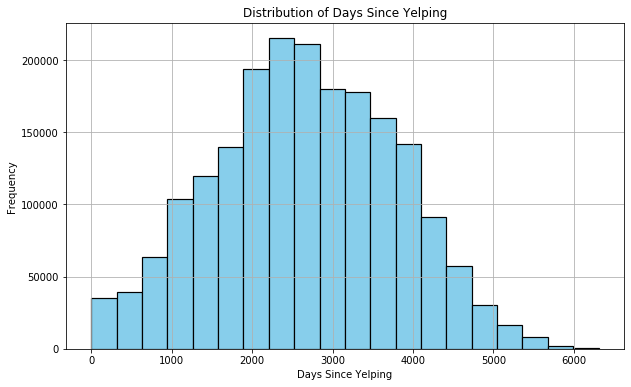

In [23]:
pandas_df = user.select("days_since_yelping").toPandas()

# Create distribution plot using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(pandas_df["days_since_yelping"], bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title("Distribution of Days Since Yelping")
plt.xlabel("Days Since Yelping")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Years elite

In [56]:
user = user.withColumn("years_elite",
                       when(col("elite").isNull() | (size(col("elite")) == 0) | (length(col("elite").getItem(0)) == 0), 0)
                       .otherwise(size("elite")))

In [50]:
user.limit(5).toPandas()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,years_elite,max_elite
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,"[NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8q...",7217,1259,5994,267,[2007],...,56,18,232,844,467,467,239,180,1,2007
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,"[ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0...",43091,13066,27281,3138,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...",...,157,251,1847,7054,3131,3131,1521,1946,14,2021
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,"[LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgy...",2086,1010,1003,52,"[2009, 2010, 2011, 2012, 2013]",...,17,3,66,96,119,119,35,18,5,2013
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,"[enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74V...",512,330,299,28,"[2009, 2010, 2011]",...,6,2,12,16,26,26,10,9,3,2011
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,"[PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMb...",29,15,7,1,[],...,0,0,1,1,0,0,0,0,0,


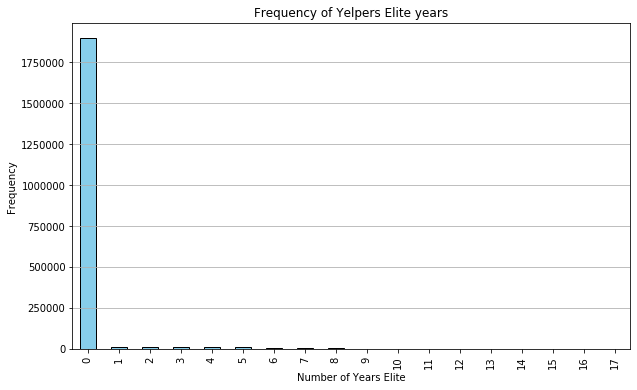

In [61]:
pandas_df = user.select("years_elite").toPandas()
frequency_counts = pandas_df["years_elite"].value_counts().sort_index()

# Plot frequency of non-zero values
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Yelpers Elite years")
plt.xlabel("Number of Years Elite")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

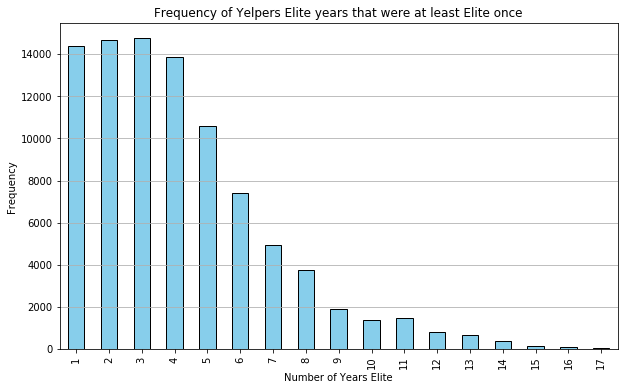

In [64]:
# Filter out rows where years_elite is not zero
pandas_df_filtered = pandas_df[pandas_df["years_elite"] != 0]
frequency_counts = pandas_df_filtered["years_elite"].value_counts().sort_index()

# Plot frequency of non-zero values
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Yelpers Elite years that were at least Elite once")
plt.xlabel("Number of Years Elite")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

## Last Year Elite

In [69]:
user = user.withColumn("last_elite_years_since_2021", (col("last_elite").cast("int") - 2021))

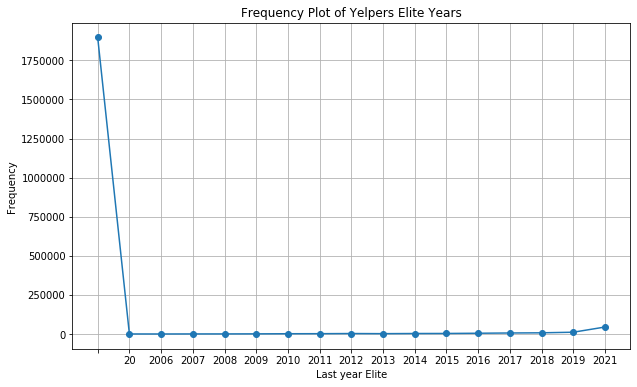

In [68]:
pandas_df = user.select("last_elite").toPandas()
frequency = pandas_df["last_elite"].value_counts()
frequency_counts = pandas_df_filtered["years_elite"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(frequency.index, frequency.values, marker='o', linestyle='-')
plt.title("Frequency Plot of Yelpers Elite Years")
plt.xlabel("Last year Elite")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Business Category

In [3]:
business.select("categories").limit(5).toPandas()

,categories
0,"[Doctors, Traditional Chinese Medicine, Naturo..."
1,"[Shipping Centers, Local Services, Notaries, M..."
2,"[Department Stores, Shopping, Fashion, Home & ..."
3,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ..."
4,"[Brewpubs, Breweries, Food]"


In [7]:
cats = business.select(explode("categories").alias("category"))
category_counts = cats.groupBy("category").count()

In [13]:
#1300 different categories
category_counts.orderBy(desc("count")).limit(50).show()

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|52268|
|                Food|27781|
|            Shopping|24395|
|       Home Services|14356|
|       Beauty & Spas|14292|
|           Nightlife|12281|
|    Health & Medical|11890|
|      Local Services|11198|
|                Bars|11065|
|          Automotive|10773|
|Event Planning & ...| 9895|
|          Sandwiches| 8366|
|American (Traditi...| 8139|
|         Active Life| 7687|
|               Pizza| 7093|
|        Coffee & Tea| 6703|
|           Fast Food| 6472|
|  Breakfast & Brunch| 6239|
|      American (New)| 6097|
|     Hotels & Travel| 5857|
+--------------------+-----+
only showing top 20 rows



In [15]:
#Write file to get generalized categories from GPT
#category_counts.coalesce(1).write.csv(f"{proj_directory}categories.csv", header= True)

In [34]:
#These were the generalized catgories found in categories from GPT
general_categories = {
    "Health_Wellness": [
        "Acupuncture", "Alternative Medicine", "Chiropractors", "Dental Hygienists",
        "Dermatologists", "Dietitians", "Doctors", "Massage Therapy", "Medical Spas",
        "Mental Health", "Naturopathic/Holistic", "Nutritionists", "Optometrists",
        "Personal Care Services", "Physical Therapy", "Psychologists", "Reflexology",
        "Rehabilitation Center", "Sports Medicine", "Traditional Chinese Medicine",
        "Weight Loss Centers", "Health & Wellness", "General Dentistry"
    ],
    "Automotive_Services": [
        "Auto Detailing", "Auto Glass Services", "Auto Loan Providers", "Auto Parts & Supplies",
        "Auto Repair", "Car Dealers", "Car Wash", "Gas Stations", "Motorcycle Repair",
        "Oil Change Stations", "Parking", "Tires", "Towing", "Vehicle Wraps", "Automotive Services",
        "Auto Repair"
    ],
    "Food_Dining": [
        "Bagels", "Bakeries", "Beer, Wine & Spirits", "Breweries", "Bubble Tea",
        "Butcher", "Cafes", "Coffee & Tea", "Convenience Stores", "Desserts",
        "Donuts", "Farmers Market", "Food Delivery Services", "Food Trucks",
        "Grocery", "Ice Cream & Frozen Yogurt", "Juice Bars & Smoothies",
        "Restaurants", "Seafood Markets", "Wineries", "Breakfast & Brunch", "Food", "Food & Dining",
        "Sandwiches", "American (Traditional)", "Pizza", "Fast Food", "Italian", "Mexican","Salad",
        "American (New)", "Burgers", "Speciality Food", "Seafood", "Chinese", "Chicken Wings", "Delis",
        "Sports Bar", "Japenese", "Barbeque", "Sushi Bars", "Soup", "Tacos", "Southern", "Thai",
        "Tex-Mex", "Cajun/Creole"
    ],
    "Shopping_Retail": [
        "Antiques", "Art Supplies", "Bookstores", "Bridal", "Clothing Stores",
        "Computers", "Consumer Electronics", "Department Stores", "Eyewear & Opticians",
        "Fashion", "Flea Markets", "Florists", "Furniture Stores", "Gift Shops",
        "Hardware Stores", "Home & Garden", "Jewelry", "Luggage", "Musical Instruments & Teachers",
        "Office Equipment", "Outlet Stores", "Pawn Shops", "Shopping Centers", "Sporting Goods",
        "Thrift Stores", "Toy Stores", "Watches", "Wholesale Stores", "Shopping", "Shopping & Retail",
        "Women's Clothing", "Flowers & Gifts"
    ],
    "Beauty_Personal Care": [
        "Barbers", "Cosmetics & Beauty Supply", "Day Spas", "Eyebrow Services",
        "Eyelash Service", "Hair Extensions", "Hair Removal", "Hair Salons",
        "Makeup Artists", "Massage", "Nail Salons", "Perfume", "Skin Care", "Tanning Salons",
        "Tattoo", "Beauty & Personal Care", "Massage", "Waxing"
    ],
    "Home_Services": [
        "Building Supplies", "Carpenters", "Carpet Installation", "Carpeting",
        "Contractors", "Electricians", "Flooring", "Garage Door Services",
        "Gardeners", "Handyman", "Heating & Air Conditioning/HVAC", "Home Cleaning",
        "Home Inspectors", "Interior Design", "Landscaping", "Locksmiths", "Movers",
        "Painters", "Plumbing", "Real Estate", "Roofing", "Security Systems",
        "Solar Installation", "Television Service Providers", "Window Washing", "Windows Installation", 
        "Home Services", "Home & Garden"
    ],
    "Professional_Services": [
        "Accountants", "Advertising", "Architects", "Career Counseling", "Employment Agencies",
        "Graphic Design", "Internet Service Providers", "IT Services & Computer Repair", "Lawyers",
        "Marketing", "Office Cleaning", "Printing Services", "Public Relations", "Security Services",
        "Web Design", "Professional Services"
    ],
    "Arts_Entertainment": [
        "Amusement Parks", "Art Galleries", "Bingo Halls", "Botanical Gardens", "Cinema",
        "Cultural Center", "Festivals", "Jazz & Blues", "Museums", "Music Venues",
        "Opera & Ballet", "Performing Arts", "Race Tracks", "Social Clubs", "Stadiums & Arenas",
        "Ticket Sales", "Zoos", "Arts & Entertainment", "Nightlife", "Bars","Pubs", "Cocktail Bars"
    ],
    "Sports_Recreation": [
        "Baseball Fields", "Basketball Courts", "Bike Rentals", "Boating", "Bowling",
        "Climbing", "Diving", "Fishing", "Fitness & Instruction", "Golf",
        "Hiking", "Horse Racing", "Horseback Riding", "Hot Air Balloons", "Kiteboarding",
        "Lakes", "Parks", "Rafting/Kayaking", "Recreation Centers", "Ski Resorts",
        "Soccer", "Sports Clubs", "Surfing", "Swimming Pools", "Tennis", "Sports & Recreation",
        "Active Life", "Gyms"
    ],
    "Education_Learning": [
        "Adult Education", "Art Classes", "Colleges & Universities", "Cooking Schools",
        "Dance Schools", "Driving Schools", "Educational Services", "Language Schools",
        "Music Lessons", "Preschools", "Private Tutors", "Test Preparation", "Tutoring Centers",
        "Vocational & Technical School", "Education & Learning", "Education", "Books", "Mags"
    ],
    "Travel_Accommodation": [
        "Airports", "Bed & Breakfast", "Car Rental", "Guest Houses", "Hostels",
        "Hotels", "Resorts", "Tour Operators", "Travel Services", "Vacation Rentals",
        "Travel & Accommodation", "Hotels & Travel"
    ],
    "Real_Estate": [
        "Apartments", "Commercial Real Estate", "Home Staging", "Mortgage Brokers",
        "Property Management", "Real Estate Agents", "Real Estate Services", "Shared Office Spaces",
        "Real Estate Developers", "Real Estate"
    ],
    "Technology_Electronics": [
        "Computer Repair", "Data Recovery", "Electronics Repair", "Home Automation",
        "Internet Service Providers", "Mobile Phones", "Security Systems", "Software Development",
        "Web Design", "IT Services & Computer Repair", "Technology & Electronics"
    ],
    "Pets_Animal_Services": [
        "Animal Shelters", "Pet Boarding", "Pet Groomers", "Pet Sitting", "Pet Stores",
        "Veterinarians", "Pet Training", "Animal Rescue", "Pet Adoption", "Pet Cafes", 
        "Pets & Animal Services", "Pet Services"
    ],
    "Financial_Services": [
        "Banks", "Credit Unions", "Financial Advising", "Insurance", "Investing",
        "Mortgage Lenders", "Tax Services", "Debt Relief Services", "Currency Exchange",
        "Payment Processing", "Financial Services"
    ],
    "Event_Planning_Services": [
        "Caterers", "DJ Services", "Event Planning", "Party & Event Planning", "Wedding Planning",
        "Party Supplies", "Personal Chefs", "Photographers", "Venues & Event Spaces", "Videographers",
        "Event Planning & Services"
    ],
    "Public_Social_Services": [
        "Community Service/Non-Profit", "Courthouses", "Fire Departments", "Landmarks & Historical Buildings",
        "Libraries", "Municipalities", "Police Departments", "Post Offices", "Social Clubs", "Historical Tours",
        "Public & Social Services"
    ],
    "Construction_Contractors": [
        "Building Supplies", "Contractors", "Electricians", "Flooring", "General Contractors",
        "HVAC", "Landscaping", "Masonry/Concrete", "Painters", "Plumbing", "Roofing", "Carpenters",
        "Windows Installation", "Construction & Contractors"
    ],
    "Transportation_Logistics": [
        "Airlines", "Airports", "Bus Stations", "Couriers & Delivery Services", "Freight Forwarding",
        "Public Transportation", "Taxis", "Transportation", "Trucking", "Moving Companies",
        "Vehicle Shipping", "Warehousing & Storage", "Transportation & Logistics"
    ]
    
}

In [82]:
#take business sample
df = business.limit(5)
df.toPandas()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426678,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"[Doctors, Traditional Chinese Medicine, Naturo...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551125,-90.335693,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"[Shipping Centers, Local Services, Notaries, M...","{'Tuesday': '8:0-18:30', 'Monday': '0:0-0:0', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880455,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Department Stores, Shopping, Fashion, Home & ...","{'Monday': '8:0-22:0', 'Thursday': '8:0-22:0',..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155563,4.0,80,1,"{'BikeParking': 'True', 'RestaurantsDelivery':...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Thursday': '7:0-20:0',..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338184,-75.471657,4.5,13,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Brewpubs, Breweries, Food]","{'Thursday': '16:0-22:0', 'Friday': '12:0-22:0..."


In [83]:
def belongs_to_general_category(specific_categories, general_category_list):
    # Check if specific_categories is None
    if specific_categories is None:
        return 0  # Return 0 (or another appropriate value) if the categories list is None
    
    # Ensure general_category_list is not None and is iterable
    if general_category_list is None:
        general_category_list = []
    
    # Original logic
    return int(any(category in specific_categories for category in general_category_list))
    
belongs_to_general_category_udf = udf(belongs_to_general_category, IntegerType())

for general_category, specific_categories in general_categories.items():
    df = df.withColumn(general_category, belongs_to_general_category_udf(df['categories'], F.array([F.lit(c) for c in specific_categories])))

In [84]:
pd.set_option('display.max_columns', None)
df.toPandas()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Health_Wellness,Automotive_Services,Food_Dining,Shopping_Retail,Beauty_Personal Care,Home_Services,Professional_Services,Arts_Entertainment,Sports_Recreation,Education_Learning,Travel_Accommodation,Real_Estate,Technology_Electronics,Pets_Animal_Services,Financial_Services,Event_Planning_Services,Public_Social_Services,Construction_Contractors,Transportation_Logistics
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426678,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"[Doctors, Traditional Chinese Medicine, Naturo...",None,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551125,-90.335693,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"[Shipping Centers, Local Services, Notaries, M...","{'Tuesday': '8:0-18:30', 'Monday': '0:0-0:0', ...",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880455,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Department Stores, Shopping, Fashion, Home & ...","{'Monday': '8:0-22:0', 'Thursday': '8:0-22:0',...",0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155563,4.0,80,1,"{'BikeParking': 'True', 'RestaurantsDelivery':...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Thursday': '7:0-20:0',...",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338184,-75.471657,4.5,13,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Brewpubs, Breweries, Food]","{'Thursday': '16:0-22:0', 'Friday': '12:0-22:0...",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
last_20_column_names = df.columns[-19:]
sum_expression = reduce(lambda a, b: a + b, (col(c) for c in last_20_column_names))
conditional_expression = when(sum_expression == 0, 1).otherwise(0)
df = df.withColumn("Other", conditional_expression)
df.toPandas()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Health_Wellness,Automotive_Services,Food_Dining,Shopping_Retail,Beauty_Personal Care,Home_Services,Professional_Services,Arts_Entertainment,Sports_Recreation,Education_Learning,Travel_Accommodation,Real_Estate,Technology_Electronics,Pets_Animal_Services,Financial_Services,Event_Planning_Services,Public_Social_Services,Construction_Contractors,Transportation_Logistics,Other
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426678,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"[Doctors, Traditional Chinese Medicine, Naturo...",None,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551125,-90.335693,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"[Shipping Centers, Local Services, Notaries, M...","{'Tuesday': '8:0-18:30', 'Monday': '0:0-0:0', ...",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880455,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Department Stores, Shopping, Fashion, Home & ...","{'Monday': '8:0-22:0', 'Thursday': '8:0-22:0',...",0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155563,4.0,80,1,"{'BikeParking': 'True', 'RestaurantsDelivery':...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Thursday': '7:0-20:0',...",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338184,-75.471657,4.5,13,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Brewpubs, Breweries, Food]","{'Thursday': '16:0-22:0', 'Friday': '12:0-22:0...",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
#Now fun on full
for general_category, specific_categories in general_categories.items():
    business = business.withColumn(general_category, belongs_to_general_category_udf(df['categories'], F.array([F.lit(c) for c in specific_categories])))
    
business = business.withColumn("Other", conditional_expression)

In [87]:
#Select columns for business
all_columns = business.columns
# Select the first column name
first_column = all_columns[0]
# Select the last 20 column names
last_20_columns = all_columns[-20:]
# Combine the first column name with the last 20 column names
selected_columns = [first_column] + last_20_columns
# Use the select method to select these columns
business = business.select(*selected_columns)

In [88]:
#Select columns for review
review = review.select("business_id", "user_id")

In [77]:
#change this to incorporate all new features
user = user.select("user_id")
#channge the name, dont want to overwrite, we need a groupby and then column count for each

In [89]:
df = business.join(review, on = "business_id", how = "inner")

In [91]:
user = user.join(df, on = "user_id", how = "inner").cach()

In [93]:
user.limit(5).toPandas()

KeyboardInterrupt: 

In [ ]:
##group by user and add up all reviews now

## Selecting only variables needed

In [ ]:
final_df = user.select("user_id", "average_stars", "days_since_yelping", )